# Okaaaay Hello time to look at some Trees ~Week 4 Assignment~

import osmnx as ox


In [5]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import osmnx as ox

In [6]:
oakt = gpd.read_file('Trees_Sidewalk_Raw.geojson')

In [7]:
oakt.shape

(42661, 51)

In [8]:
type(oakt)

geopandas.geodataframe.GeoDataFrame

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
oakt.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
42433     42434       677          6          6        8  7/21/06  09:38:35   

       LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH   LOWWELL HVW STUMP  \
42433  199.4389   -1   -1         4          4          0  Moderate   0     0   

      BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN    SPECIES WATERMET  \
42433          0          0         0    None     None  Celtis sp        0   

      FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
42433       0        0         0        0     Small  None         -1   

                    TREE_KEY  ADDRNUM        STNAME IS_PROBLEM DEAD DEADWOOD  \
42433  TREE_7/21/06_09:38:35     5863  MACARTHUR BL      False    0     None   

      ARB_CMNT    ARB_TIME  ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM  \
42433     None  2:20:00 PM  10/12/06        1     Com             1   

      FACILITYID LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE  \
42433      72270     None         None        None      None          None   

      INSTALL_ID DESIGNATION                     geometry  
42433       None        None  POINT (-122.18478 37.77584)

In [31]:
oakt.SPECIES.value_counts()

Tree well only                     4053
Platanus acerifolia                3788
Liquidambar styraciflua            3312
Pyrus calleryana cvs               2683
Prunus cerasifera/blireiana        2048
Lagerstroemia indica               1953
Pyrus kawakami                     1427
Magnolia grandiflora               1375
Fraxinus o. `Raywood'              1327
Pistacia chinensis                 1150
Unknown                            1123
Acer sp                             971
Prunus sp                           882
Fraxinus sp                         824
Other                               763
Lophostemon confertus               632
Ginkgo biloba                       576
Celtis sp                           567
Shrub                               565
Crataegus phaenopyrum               549
Cinnamomum camphora                 522
Quercus sp                          479
Dead                                452
Podocarpus gracilior                425
Cercis sp                           421


In [128]:
columns_trimmed = ['OBJECTID',
                       'LOCATION',
                       'SPECIES',
                       'DEAD',
                       'geometry']

In [129]:
oakt_deadmap = oakt[columns_trimmed]

In [130]:
list=['-1']
list=oakt.DEAD.isin(list)
oakt_deadmap=oakt[list]

In [131]:
oakt_deadmap["DEAD"].replace({"-1":"Dead Tree"}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [132]:
type(oakt_deadmap)

geopandas.geodataframe.GeoDataFrame

In [133]:
oakt_deadmap.sample()

OBJECTID SEGMENTID PLANAREAID COUNCILDIS SURVEYOR COLLDATE  COLLTIME  \
7232      7233      1518          3          1        7   6/1/06  14:18:59   

      LOCATION TREE WELL WELLWIDTH WELLLENGTH PAREAWIDTH LOWWELL HVW STUMP  \
7232      18.0   -1   -1         2          2          0    None   0    -1   

     BRKNHNGLMB OPENCAVITY STRCTRCNT LOWLIMB TRNKLEAN SPECIES WATERMET  \
7232          0          0         0    None     None    Dead        0   

     FIREHYD DRIVEWAY LIGHTPOLE STRTCRNR TRUNKDIAM GRATE STAKEGUARD  \
7232       0        0         0        0      None  None          0   

                  TREE_KEY  ADDRNUM   STNAME IS_PROBLEM       DEAD DEADWOOD  \
7232  TREE_6/1/06_14:18:59      390  40TH ST      False  Dead Tree     High   

     ARB_CMNT    ARB_TIME ARB_DATE SYM_CODE LANDUSE  TRUNKDIA_NUM FACILITYID  \
7232     None  6:24:30 PM  8/23/06        1     Com             0      56819   

     LEGACYID WARRANTYDATE INSTALLDATE CONDITION CONDITIONDATE INSTALL_ID  \
7232     None         None        None      None          None       None   

     DESIGNATION                     geometry  
7232        None  POINT (-122.25943 37.82913)

<AxesSubplot:>

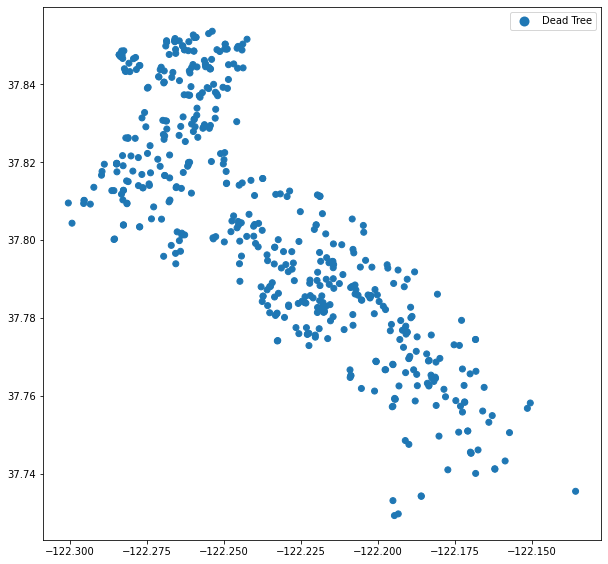

In [127]:
oakt_deadmap.plot(figsize=(10,10),
         column='DEAD',
         cmap='tab20',
         legend=True)


In [53]:
list=['Acer sp', 'Acer palmatum','Acer negundo', 'Acer rubrum','Acer macrophyllum','Acer buergeranum','Acer saccharinum',]
list=oakt.SPECIES.isin(list)
oakt_maple_species=oakt[list]

In [92]:
oakt_maple_species["SPECIES"].replace({"Acer sp": "Common Maple", 
                                  "Acer palmatum": "Japanese Maple",
                                  "Acer negundo":"Boxelder Maple",
                                  "Acer rubrum":"Red Maple",
                                 "Acer macrophyllum":"Bigleaf Maple",
                                 "Acer buergeranum":"Trident Maple",
                                 "Acer saccharinum":"Silver Maple",}, inplace=True)

In [93]:
list=['Dead']
list=oakt.SPECIES.isin(list)
oakt_dead_species=oakt[list]

In [59]:
list=['Platanus acerifolia', 
      'Liquidambar styraciflua', 
      'Pyrus calleryana cvs', 
      'Prunus cerasifera/blireiana', 
      'Lagerstroemia indica', 
      'Pyrus kawakami', 
      'Magnolia grandiflora', 
      'Fraxinus o. `Raywood',  
      'Pistacia chinensis']
list=oakt.SPECIES.isin(list)
oakt_lowest=oakt[list]

In [75]:
list=['Cupressus sp', 'Cupressus sempervirens', 
      'Pinus sp','Pinus pinea', 'Pinus radiata', 'Pinus canariensis','Pinus thunbergiana', 
      'Juniperus sp',
      'Sequoia sempervirens',
      'Calocedrus decurrens', 'Cedrus deodara',   ]
list=oakt.SPECIES.isin(list)
oakt_conifers=oakt[list]

In [88]:
oakt_conifers["SPECIES"].replace({"Cupressus sp": "Cupressus", 
                                  "Cupressus sempervirens": "Mediterranean Cypress",
                                  "Pinus sp":"Common Pine",
                                  "Pinus pinea":"Stone Pine",
                                 "Pinus radiata":"Monetery Pine",
                                 "Pinus canariensis":"Canary Island Pine",
                                 "Pinus thunbergiana":"Japanese Black Pine",
                                 "Juniperus sp":"Common Juniper",
                                 "Sequoia sempervirens":"Coastal Redwood",
                                 "Calocedrus decurrens":"Incense Cedar",
                                 "Cedrus deodara":"Deodar Cedar"}, inplace=True)

In [ ]:
list=[]
list=oakt.SPECIES.isin(list)
oakt_fruit=oakt[list]

<AxesSubplot:>

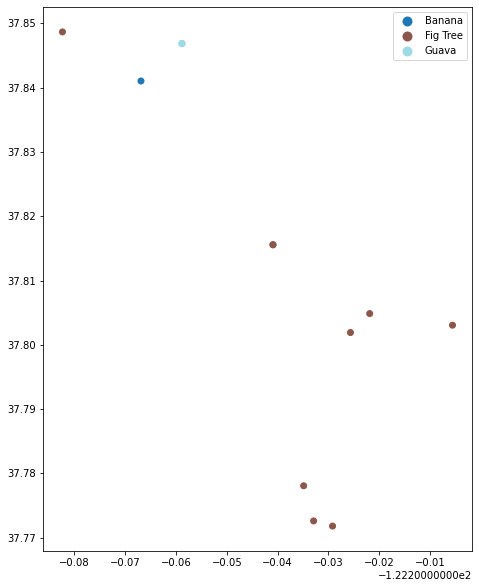

In [33]:
oakt_fruit.plot(figsize=(10,10),
         column='SPECIES',
         cmap='tab20',
         legend=True)

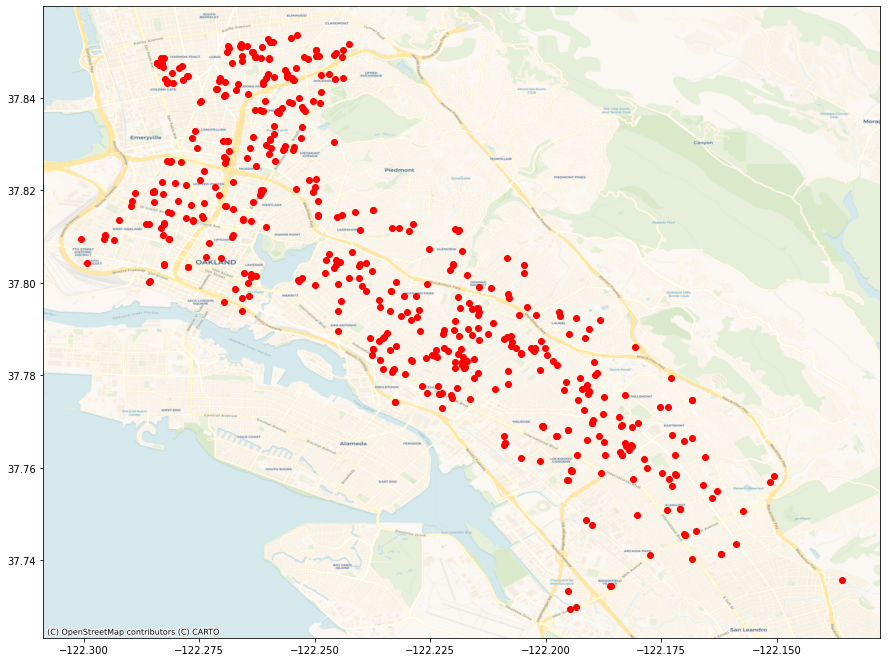

In [34]:
ax = oakt_deadmap.plot(color="red", figsize=(15,15))
ctx.add_basemap(ax, crs=oakt_deadmap.crs.to_string(),source=ctx.providers.CartoDB.Voyager, zoom=14)

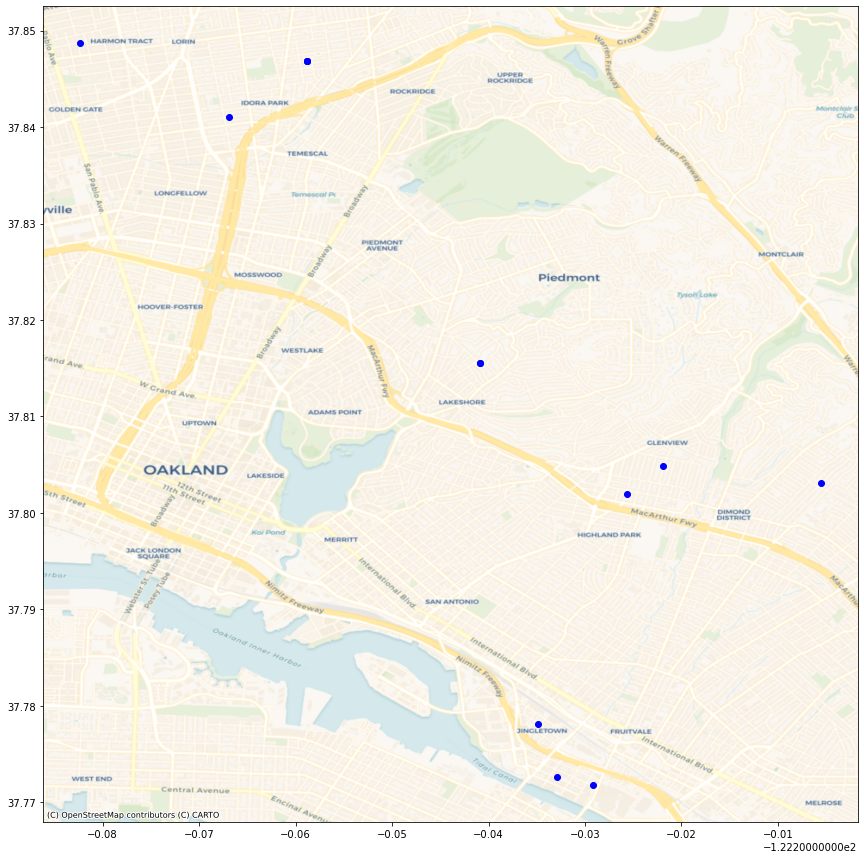

In [35]:
ax = oakt_fruit.plot(color="blue", figsize=(15, 15))
ctx.add_basemap(ax, crs=oakt_fruit.crs.to_string(), source=ctx.providers.CartoDB.Voyager, zoom=14)

In [100]:
oakt_fruit_mercator = oakt_fruit.to_crs(epsg=3857)

oakt_deadmap_mercator = oakt_deadmap.to_crs(epsg=3857)

oakt_dead_species_mercator = oakt_dead_species.to_crs(epsg=3857)

oakt_maple_species_mercator = oakt_maple_species.to_crs(epsg=3857)

oakt_topten_mercator = oakt_topten.to_crs(epsg=3857)

oakt_conifers_mercator = oakt_conifers.to_crs(epsg=3857)

(-13612837.401742341, -13603435.97047546, 4546699.831205474, 4558611.566562519)

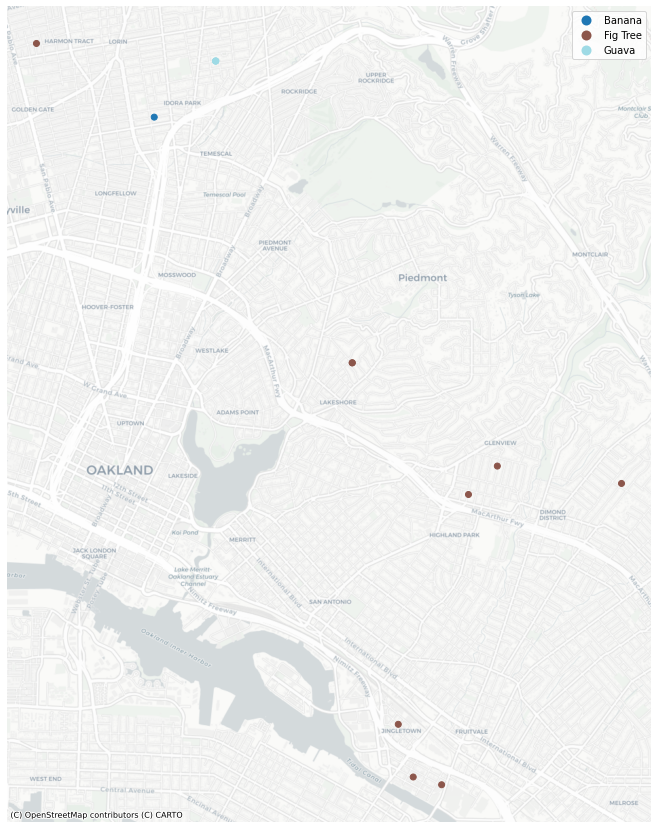

In [71]:
ax = oakt_fruit_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_fruit_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.axis('off')

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

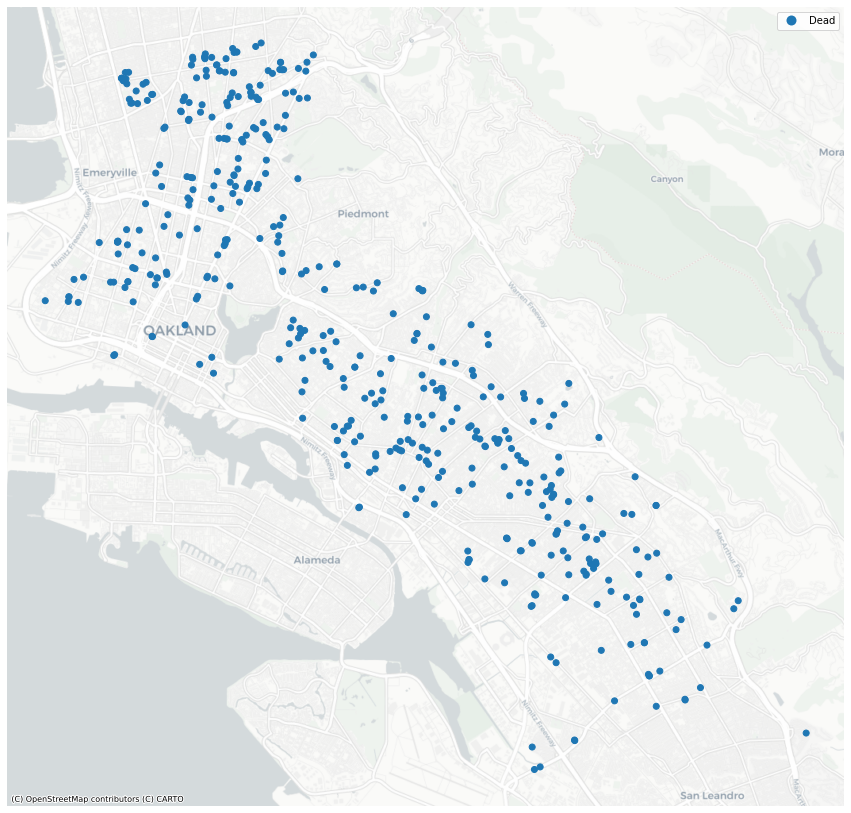

In [72]:
ax = oakt_dead_species_mercator.plot(column='SPECIES',cmap="tab20", figsize=(15, 15), legend=True)
ctx.add_basemap(ax, crs=oakt_dead_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.axis('off')

(-13615357.776870029,
 -13595189.601155275,
 4540389.949395995,
 4559646.684424193)

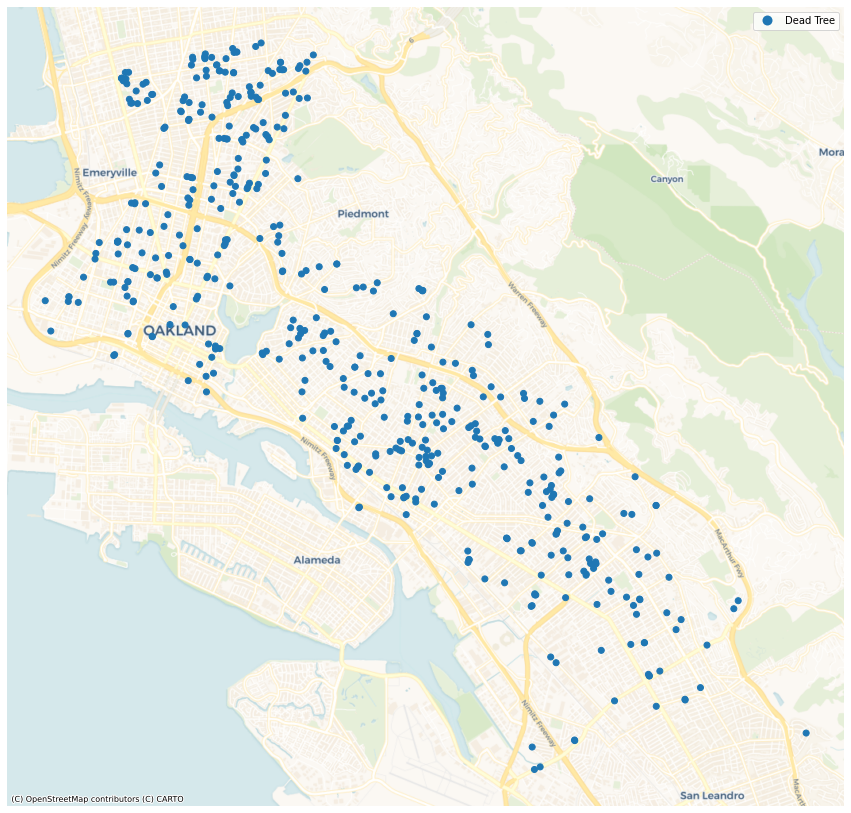

In [137]:
ax = oakt_deadmap_mercator.plot(column='DEAD', figsize=(15, 15), cmap="tab20", legend=True,)
ctx.add_basemap(ax, crs=oakt_deadmap_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.axis('off')

(-13615524.59856178, -13595224.544737143, 4540519.06775298, 4560243.283530435)

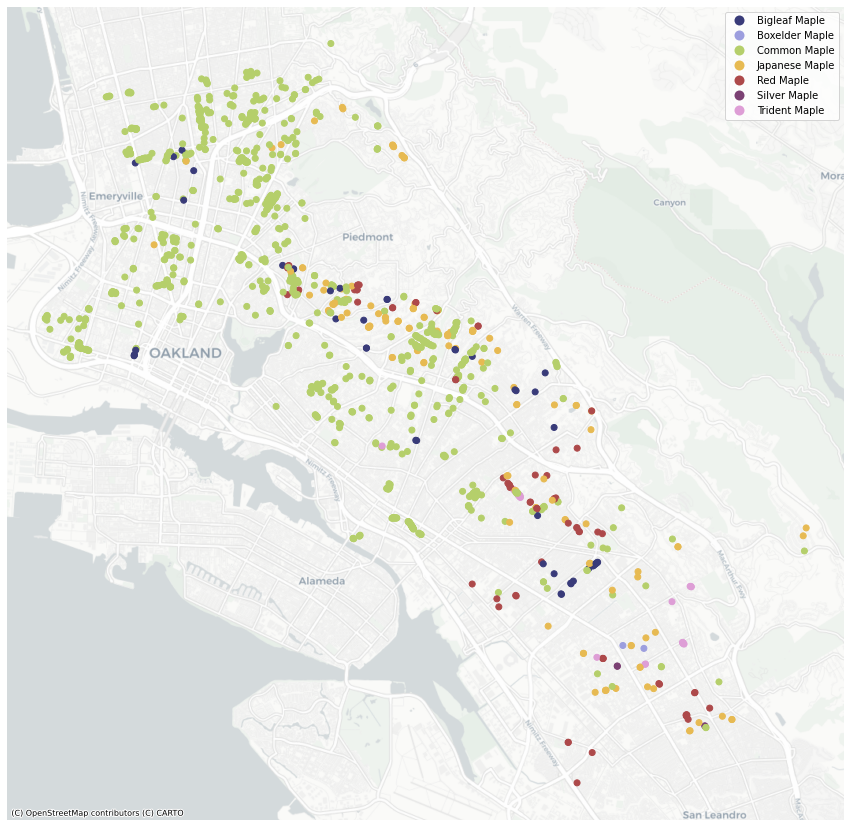

In [95]:
ax = oakt_maple_species_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_maple_species_mercator.crs.to_string(), source=ctx.providers.CartoDB.Positron)

ax.axis('off')

(-13615309.46443634, -13594820.121701268, 4540784.831160204, 4559368.73495584)

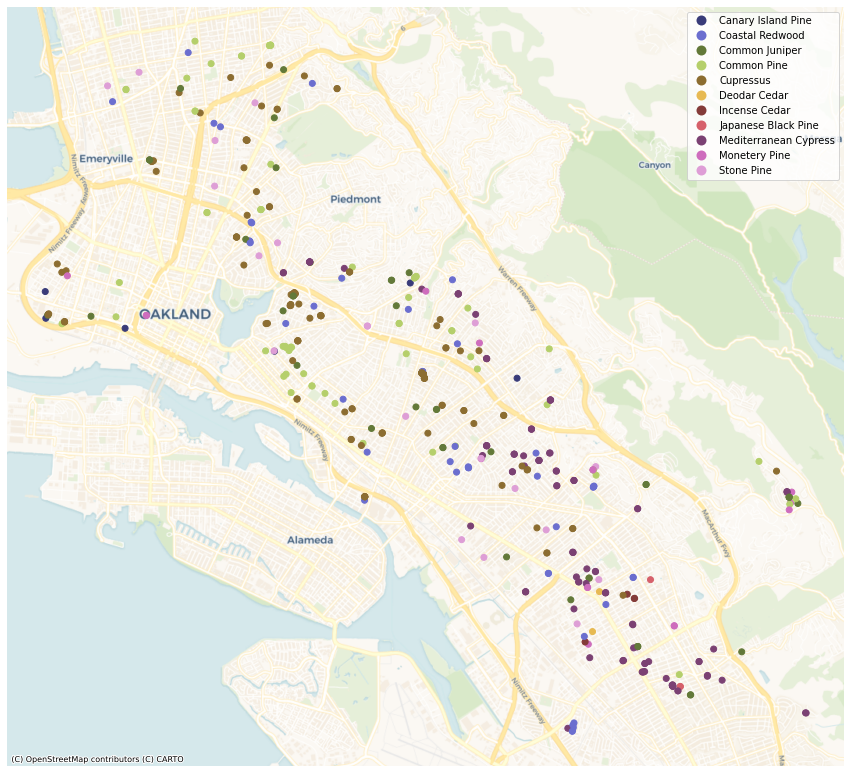

In [90]:
ax = oakt_conifers_mercator.plot(column='SPECIES', figsize=(15, 15), cmap="tab20b", legend=True)
ctx.add_basemap(ax, crs=oakt_conifers_mercator.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

ax.axis('off')